## loading all libraries and datasets 

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
x=pd.read_csv(r"F:\RHUL\kaggle\train.csv")


In [2]:
#x.head()
#x.info()
xx=pd.read_csv(r"F:\RHUL\kaggle\test.csv")


## feature engineering

-- deleting some of features under manual assumption that it has no influence on recommendations from a search

In [5]:
X_train = x.drop(['srch_visitor_id'], axis=1)
X_train = X_train.drop(['srch_visitor_visit_nbr'], axis=1)
X_train = X_train.drop(['srch_visitor_loc_country'], axis=1)
X_train = X_train.drop(['srch_visitor_loc_region'], axis=1)
X_train = X_train.drop(['srch_visitor_loc_city'], axis=1)
X_train = X_train.drop(['srch_visitor_wr_member'], axis=1)
X_train = X_train.drop(['srch_bw'], axis=1)
X_train = X_train.drop(['srch_mobile_bool'], axis=1)
X_train = X_train.drop(['srch_mobile_app'], axis=1)
X_train = X_train.drop(['srch_device'], axis=1)
X_train = X_train.drop(['srch_currency'], axis=1)
X_train = X_train.drop(['prop_dotd_bool'], axis=1)
X_train = X_train.drop(['srch_date_time'], axis=1)
#------------------------------------------------------------
X_test = xx.drop(['srch_visitor_id'], axis=1)
X_test = X_test.drop(['srch_visitor_visit_nbr'], axis=1)
X_test = X_test.drop(['srch_visitor_loc_country'], axis=1)
X_test = X_test.drop(['srch_visitor_loc_region'], axis=1)
X_test = X_test.drop(['srch_visitor_loc_city'], axis=1)
X_test = X_test.drop(['srch_visitor_wr_member'], axis=1)
X_test = X_test.drop(['srch_bw'], axis=1)
X_test = X_test.drop(['srch_mobile_bool'], axis=1)
X_test = X_test.drop(['srch_mobile_app'], axis=1)
X_test = X_test.drop(['srch_device'], axis=1)
X_test = X_test.drop(['srch_currency'], axis=1)
X_test = X_test.drop(['prop_dotd_bool'], axis=1)
X_test = X_test.drop(['srch_date_time'], axis=1)

## checking missing values

## filling missing values by mean of the variable

In [19]:
X_test.isnull().sum().sort_values(ascending=False)

srch_local_date                      0
prop_hostel_bool                     0
prop_key                             0
srch_posa_country                    0
srch_hcom_destination_id             0
srch_dest_longitude                  0
srch_dest_latitude                   0
srch_ci                              0
srch_co                              0
srch_ci_day                          0
srch_co_day                          0
srch_los                             0
srch_adults_cnt                      0
srch_children_cnt                    0
srch_rm_cnt                          0
prop_travelad_bool                   0
prop_price_without_discount_local    0
prop_price_without_discount_usd      0
prop_price_with_discount_local       0
prop_price_with_discount_usd         0
prop_imp_drr                         0
prop_brand_bool                      0
prop_starrating                      0
prop_super_region                    0
prop_continent                       0
prop_country             

In [7]:

X_train = X_train.drop(['srch_posa_continent'], axis=1)
X_test = X_test.drop(['srch_posa_continent'], axis=1)
X_train.prop_price_without_discount_local.mean()
X_train['prop_review_count']=X_train['prop_review_count'].fillna(0)

In [17]:


#X_train['minus_discount']=X_train['minus_discount'].fillna(148)
X_train['prop_price_with_discount_local']=X_train['prop_price_with_discount_local'].fillna(8519)
X_train['prop_price_without_discount_local']=X_train['prop_price_without_discount_local'].fillna(12045)
X_train['prop_review_count']=X_train['prop_review_count'].fillna(0)
X_test['prop_price_with_discount_local']=X_test['prop_price_with_discount_local'].fillna(8519)
X_test['prop_price_without_discount_local']=X_test['prop_price_without_discount_local'].fillna(12045)
X_test['prop_review_count']=X_test['prop_review_count'].fillna(0)
#X_train.isnull().sum().sort_values(ascending=False)

            

In [18]:
#X_train['srch_adults_cnt'].mean()
#X_train['srch_children_cnt'].mean()
#X_train['prop_price_without_discount_usd'].mean()
#X_train['prop_price_with_discount_usd'].mean()


In [12]:

X_train['prop_price_without_discount_usd']=X_train['prop_price_without_discount_usd'].fillna(452)
X_train['prop_price_with_discount_usd']=X_train['prop_price_with_discount_usd'].fillna(304)
X_train['prop_review_score']=X_train['prop_review_score'].fillna(0)
X_train['srch_adults_cnt']=X_train['srch_adults_cnt'].fillna(2)
X_train['srch_children_cnt']=X_train['srch_children_cnt'].fillna(0)


X_test['prop_price_without_discount_usd']=X_test['prop_price_without_discount_usd'].fillna(452)
X_test['prop_price_with_discount_usd']=X_test['prop_price_with_discount_usd'].fillna(304)
X_test['prop_review_score']=X_test['prop_review_score'].fillna(0)
X_test['srch_adults_cnt']=X_test['srch_adults_cnt'].fillna(2)
X_test['srch_children_cnt']=X_test['srch_children_cnt'].fillna(0)

### replacing the categorical values by integer values using categorical function

In [20]:

X_train.srch_posa_country = pd.Categorical(X_train.srch_posa_country)
X_train['country_code'] = X_train.srch_posa_country.cat.codes



In [21]:
X_test.srch_posa_country = pd.Categorical(X_test.srch_posa_country)
X_test['country_code'] = X_test.srch_posa_country.cat.codes
X_train = X_train.drop(['srch_posa_country'], axis=1)
X_test = X_test.drop(['srch_posa_country'], axis=1)

In [22]:
#X_train.info()
y_train=X_train['prop_booking_bool']
X_train=X_train.drop(['prop_booking_bool'],axis=1)

### extracting day ,month,quarters from the date variable

In [23]:
X_train['srch_ci']= pd.to_datetime(X_train['srch_ci'])
X_train['srch_co']= pd.to_datetime(X_train['srch_co']) 
X_train['srch_local_date']= pd.to_datetime(X_train['srch_local_date']) 
X_train['ci_month'] = X_train['srch_ci'].dt.month
X_train['ci_quarter'] = X_train['srch_ci'].dt.quarter
X_train['ci_day'] = X_train['srch_ci'].dt.day
X_train['co_month'] = X_train['srch_co'].dt.month
X_train['co_quarter'] = X_train['srch_co'].dt.quarter
X_train['co_day'] = X_train['srch_co'].dt.day
X_train['lo_month'] = X_train['srch_local_date'].dt.month
X_train['lo_quarter'] = X_train['srch_local_date'].dt.quarter
X_train['lo_day'] = X_train['srch_local_date'].dt.day  
#-------------------------------------------------------------------


In [24]:
X_test['srch_ci']= pd.to_datetime(X_test['srch_ci'])
X_test['srch_co']= pd.to_datetime(X_test['srch_co']) 
X_test['srch_local_date']= pd.to_datetime(X_test['srch_local_date']) 
X_test['ci_month'] = X_test['srch_ci'].dt.month
X_test['ci_quarter'] = X_test['srch_ci'].dt.quarter
X_test['ci_day'] = X_test['srch_ci'].dt.day
X_test['co_month'] = X_test['srch_co'].dt.month
X_test['co_quarter'] = X_test['srch_co'].dt.quarter
X_test['co_day'] = X_test['srch_co'].dt.day
X_test['lo_month'] = X_test['srch_local_date'].dt.month
X_test['lo_quarter'] = X_test['srch_local_date'].dt.quarter
X_test['lo_day'] = X_test['srch_local_date'].dt.day   

In [25]:
#X_train.info()
X_train = X_train.drop(['srch_ci'], axis=1)
X_train = X_train.drop(['srch_co'], axis=1)
X_train = X_train.drop(['srch_local_date'], axis=1)
#--------------------------------------

X_test = X_test.drop(['srch_ci'], axis=1)
X_test = X_test.drop(['srch_co'], axis=1)
X_test = X_test.drop(['srch_local_date'], axis=1)


In [26]:
X_train['prop_super_region'].unique() 
#X_train['prop_continent'].unique() 
#X_train['prop_country'].unique() 

array(['APAC', 'EMEA', 'AMER', 'LATAM'], dtype=object)

### encoding the categorical names from other features

In [27]:
ports = {'JAPAN':1, 'UNITED KINGDOM':2, 'UNITED STATES OF AMERICA':3, 'FRANCE':4,
       'SOUTH KOREA':5, 'ITALY':6, 'MARTINIQUE':7}
data = [X_train, X_test]

for dataset in data:
    dataset['prop_country'] = dataset['prop_country'].map(ports)

In [28]:
ports = {'ASIA':1, 'EUROPE':2, 'NORTHAMERICA':3, 'LATAM':4}
data = [X_train, X_test]

for dataset in data:
    dataset['prop_continent'] = dataset['prop_continent'].map(ports)

In [29]:
ports = {'APAC':1, 'EMEA':2, 'AMER':3, 'LATAM':4}
data = [X_train, X_test]

for dataset in data:
    dataset['prop_super_region'] = dataset['prop_super_region'].map(ports)

### creating new feature

In [30]:

data = [X_train, X_test]

for dataset in data:
    
    dataset['minus_discount']=dataset['prop_price_without_discount_usd']-dataset['prop_price_with_discount_usd']

## gridsearchcv -best params selection using cross validation

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
pipeline_forest = make_pipeline(MinMaxScaler(), RandomForestRegressor())
param_grid = param_grid = { 
            
             "n_estimators"      : [50,70,100],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            
            }

grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [32]:
print('test',X_test.shape)
print('train',X_train.shape)

test (351544, 39)
train (841115, 39)


### using minmaxscaler to normalize the dataset and apply random forest meta algorithm

In [33]:
pipeline_forest = make_pipeline(MinMaxScaler(), RandomForestRegressor(n_estimators=10))

pipeline_forest.fit(X_train, y_train)

NameError: name 'make_pipeline' is not defined

### calculating influence of  every feature in learning process

In [380]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(RandomForestRegressor().fit(X_train, y_train).feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

C:\Users\ashwin_03\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,importance
feature,
prop_review_count,0.108
prop_price_with_discount_usd,0.080
lo_day,0.079
minus_discount,0.074
prop_price_with_discount_local,0.064
prop_price_without_discount_usd,0.063
prop_price_without_discount_local,0.062
ci_day,0.055
co_day,0.054


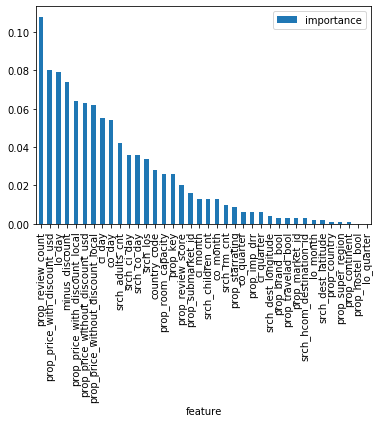

In [381]:
importances.plot.bar()

### predict missing values in test set using knn

In [316]:
from sklearn.neighbors import KNeighborsClassifier
bb=X_test[X_test['prop_country'].isnull()]
nn=X_test[X_test['prop_country'].notnull()]
yy=nn['prop_country']
nn=nn.drop(['prop_country'],axis=1)

In [319]:
new=KNeighborsClassifier().fit(nn,yy)
#X_test['prop_price_with_discount_local'].mean()  
bb=bb.drop(['prop_country'],axis=1)
new.predict(bb)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [321]:
#X_test['prop_country']=X_test['prop_country'].fillna(1)
#X_test.isnull().sum().sort_values(ascending=False)

### score from the ML algorithm

In [370]:
pipeline_forest.score(X_train,y_train)

0.7566248371134345

In [330]:
X_train=X_train.drop(['code'],axis=1)

In [371]:
pipeline_forest.predict(X_test)

array([0. , 0. , 0. , ..., 0.1, 0. , 0. ])

In [373]:
submission = pd.DataFrame({'srch_id':xx['srch_id'],'prop_key':X_test['prop_key'],'score':pipeline_forest.predict(X_test)})

In [374]:
submission = submission.sort_values(by =['srch_id', 'score'] )

In [375]:
sub_file=submission[['srch_id','prop_key']]


In [376]:
filename = 'expedia_test1.csv'

sub_file.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: expedia_test1.csv
